June 1, 2021

Justyna Grunwald, 145368, I3.1

# 1. Zadanie domowe - analiza danych + testy statystyczne

In [1]:
Dane <- read.csv("Video_Games_Sales.csv") #https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings?select=Video_Games_Sales_as_at_22_Dec_2016.csv
Dane

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,,NA,,
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,,NA,,
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,,NA,,
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,E


# 2. Opis danych

Dane składają się z próby losowo wybranych tytułów gier. Tabela zawiera informacje takie jak: globalne statystyki sprzedaży jak i podzielone na kontynenty, oceny tytułów z rozróżnieniem na ocenę użytkowników i krytyków, rok wydania, platforma na którą gra została wydana i wydawcę. 

Sprzedaże są podawane w milionach,

oceny krytyków w skali [1-100],

oceny użytkowników w skali [1-10].

Usunęłam z obliczeń dane, które zawierają wartości puste lub niezdefiniowane.

In [2]:
attach(Dane)
#detach(Dane)

Przygotowanie danych

In [3]:
Global_Sales<-Dane$Global_Sales[Dane$Global_Sales>0]
EU_Sales<-Dane$EU_Sales[Dane$EU_Sales>0]
NA_Sales<-Dane$NA_Sales[Dane$NA_Sales>0]
Critic_Score<-Dane$Critic_Score[!is.na(Dane$Critic_Score)]
Critic_Score<-Critic_Score[Critic_Score>0] #gra mogła dostać najniższą ocenę "1/100"
User_Score<-Dane$User_Score[Dane$User_Score!=""]
User_Score<-User_Score[User_Score!="tbd"]
User_Score<-as.numeric(User_Score)
User_Score<-User_Score[User_Score>0]

Generator, z którego póżniej korzystam do losowania danych (po wygenerowaniu danych przypisałam je ręcznie jako wektor, aby za każfym razem nie dostać innej puli danych):

7.3,7.3,8.6,8.2,8.2,6.2,9.1,7.5,8.2,8.9,...,5.9,7.3,6.4,8.4,4.7,3.3,6.2,8.5,7.5,6.3


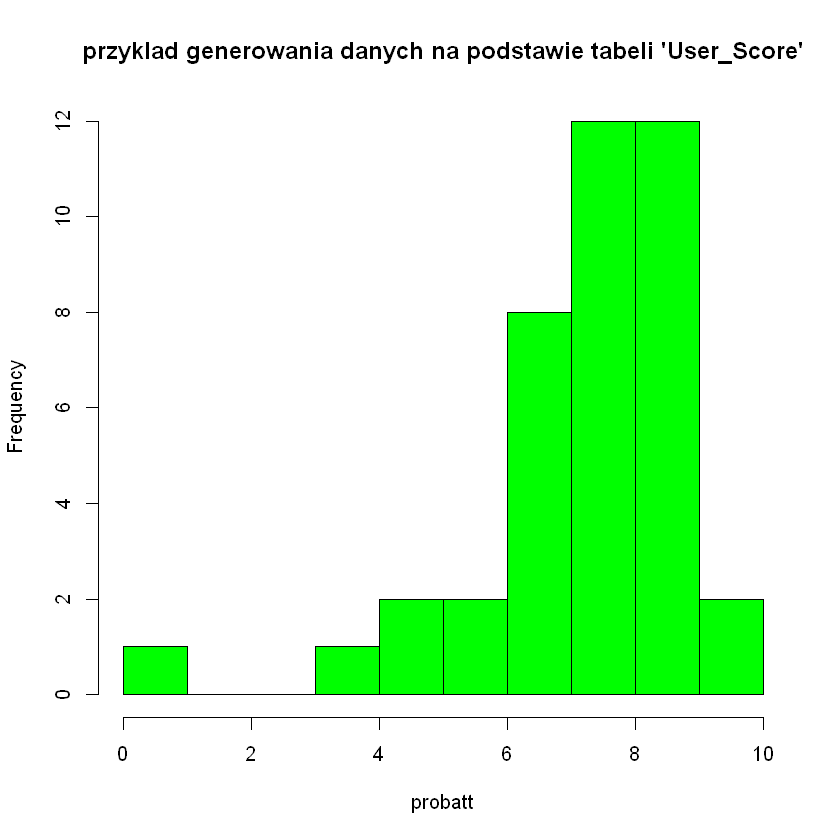

In [4]:
probatt<-array(0,dim=c(1,40))
for(i in 1:40){
    probatt[i]<-User_Score[runif(1,min=1,max=length(User_Score))]
}
probatt
hist(probatt,col="green",main="przykład generowania danych na podstawie tabeli 'User_Score'")

# 3. Podstawowe statystyki opisowe wybranych kolumn

## 3.1 Liczność danych

In [5]:
n <- length(Year_of_Release)
n

[1] 16719

## 3.2 Średnia

In [6]:
mean_global_sales <- mean(Global_Sales)
mean_eu_sales <- mean(EU_Sales) 
mean_na_sales <- mean(NA_Sales)

#bez uwzgledniania ocen, które nie zostały podane
mean_critic_score <- mean(Critic_Score)
mean_user_score <- mean(User_Score)

print("średnia sprzedaży globalnej")
mean_global_sales
print("średnia sprzedaży w europie")
mean_eu_sales
print("średnia sprzedaży w północnej ameryce")
mean_na_sales
print("średnia ocen krytyków")
mean_critic_score
print("średnia ocen użytkowników")
mean_user_score

[1] "srednia sprzedazy globalnej"


[1] 0.5335427

[1] "srednia sprzedazy w europie"


[1] 0.2235749

[1] "srednia sprzedazy w pólnocnej ameryce"


[1] 0.360634

[1] "srednia ocen krytyków"


[1] 68.96768

[1] "srednia ocen uzytkowników"


[1] 7.125985

## 3.3 mediana

In [7]:
median_global_sales <- median(Global_Sales)
median_eu_sales <- median(EU_Sales) 
median_na_sales <- median(NA_Sales)
median_critic_score <- median(Critic_Score)
median_user_score <- median(User_Score)

print("mediana sprzedaży globalnej")
median_global_sales
print("mediana sprzedaży w europie")
median_eu_sales
print("mediana sprzedaży w północnej ameryce")
median_na_sales
print("mediana ocen krytyków")
median_critic_score
print("mediana ocen użytkowników")
median_user_score 

[1] "mediana sprzedazy globalnej"


[1] 0.17

[1] "mediana sprzedazy w europie"


[1] 0.07

[1] "mediana sprzedazy w pólnocnej ameryce"


[1] 0.14

[1] "mediana ocen krytyków"


[1] 71

[1] "mediana ocen uzytkowników"


[1] 7.5

## 3.4 wartość minimalna

In [8]:
min_global_sales <- min(Global_Sales)
min_eu_sales <- min(EU_Sales) 
min_na_sales <- min(NA_Sales)
min_critic_score <- min(Critic_Score)
min_user_score <- min(User_Score)

print("minimum sprzedaży globalnej")
min_global_sales
print("minimum sprzedaży w europie")
min_eu_sales
print("minimum sprzedaży w północnej ameryce")
min_na_sales
print("minimum ocen krytyków")
min_critic_score
print("minimum ocen użytkowników")
min_user_score 

[1] "minimum sprzedazy globalnej"


[1] 0.01

[1] "minimum sprzedazy w europie"


[1] 0.01

[1] "minimum sprzedazy w pólnocnej ameryce"


[1] 0.01

[1] "minimum ocen krytyków"


[1] 13

[1] "minimum ocen uzytkowników"


[1] 0.2

## 3.5 wartość maksymalna

In [9]:
max_global_sales <- max(Global_Sales)
max_eu_sales <- max(EU_Sales) 
max_na_sales <- max(NA_Sales)
max_critic_score <- max(Critic_Score)
max_user_score <- max(User_Score)

print("maksimum sprzedaży globalnej")
max_global_sales
print("maksimum sprzedaży w europie")
max_eu_sales
print("maksimum sprzedaży w północnej ameryce")
max_na_sales
print("maksimum ocen krytyków")
max_critic_score
print("maksimum ocen użytkowników")
max_user_score 

[1] "maksimum sprzedazy globalnej"


[1] 82.53

[1] "maksimum sprzedazy w europie"


[1] 28.96

[1] "maksimum sprzedazy w pólnocnej ameryce"


[1] 41.36

[1] "maksimum ocen krytyków"


[1] 98

[1] "maksimum ocen uzytkowników"


[1] 9.7

## 3.6 wariancja

In [10]:
var_global_sales <- var(Global_Sales)
var_eu_sales <- var(EU_Sales) 
var_na_sales <- var(NA_Sales)
var_critic_score <- var(Critic_Score)
var_user_score <- var(User_Score)

print("wariancja w sprzedaży globalnej")
var_global_sales
print("wariancja w sprzedaży w europie")
var_eu_sales
print("wariancja w sprzedaży w północnej ameryce")
var_na_sales
print("wariancja w ocenach krytyków")
var_critic_score
print("wariancja w ocenach użytkowników")
var_user_score 

[1] "wariancja w sprzedazy globalnej"


[1] 2.396103

[1] "wariancja w sprzedazy w europie"


[1] 0.3729355

[1] "wariancja w sprzedazy w pólnocnej ameryce"


[1] 0.8712756

[1] "wariancja w ocenach krytyków"


[1] 194.2724

[1] "wariancja w ocenach uzytkowników"


[1] 2.243624

## 3.7 odchylenie standardowe

In [11]:
od_global_sales <- sd(Global_Sales)
od_eu_sales <- sd(EU_Sales) 
od_na_sales <- sd(NA_Sales)
od_critic_score <- sd(Critic_Score)
od_user_score <- sd(User_Score)

print("odchylenie standardowe w sprzedaży globalnej")
od_global_sales
print("odchylenie standardowe w sprzedaży w europie")
od_eu_sales
print("odchylenie standardowe w sprzedaży w północnej ameryce")
od_na_sales
print("odchylenie standardowe w ocenach krytyków")
od_critic_score
print("odchylenie standardowe w ocenach użytkowników")
od_user_score

[1] "odchylenie standardowe w sprzedazy globalnej"


[1] 1.547935

[1] "odchylenie standardowe w sprzedazy w europie"


[1] 0.6106844

[1] "odchylenie standardowe w sprzedazy w pólnocnej ameryce"


[1] 0.9334214

[1] "odchylenie standardowe w ocenach krytyków"


[1] 13.93816

[1] "odchylenie standardowe w ocenach uzytkowników"


[1] 1.497873

## 3.8 kurtoza

In [12]:
kurtosis_global_sales <- sum((Global_Sales-mean_global_sales)^4)/(length(Global_Sales)*var_global_sales^2)
kurtosis_eu_sales <- sum((EU_Sales-mean_eu_sales)^4)/(length(EU_Sales)*var_eu_sales^2) 
kurtosis_na_sales <- sum((NA_Sales-mean_na_sales)^4)/(length(NA_Sales)*var_na_sales^2)
kurtosis_critic_score <- sum((Critic_Score-mean_critic_score)^4)/(length(Critic_Score)*var_critic_score^2)
kurtosis_user_score <- sum((User_Score-mean_user_score)^4)/(length(User_Score)*var_user_score^2)

print("kurtoza w sprzedaży globalnej")
kurtosis_global_sales
print("kurtoza w sprzedaży w europie")
kurtosis_eu_sales
print("kurtoza w sprzedaży w północnej ameryce")
kurtosis_na_sales
print("kurtoza w ocenach krytyków")
kurtosis_critic_score
print("kurtoza w ocenach użytkowników")
kurtosis_user_score

[1] "kurtoza w sprzedazy globalnej"


[1] 606.8447

[1] "kurtoza w sprzedazy w europie"


[1] 531.0334

[1] "kurtoza w sprzedazy w pólnocnej ameryce"


[1] 507.6962

[1] "kurtoza w ocenach krytyków"


[1] 3.141254

[1] "kurtoza w ocenach uzytkowników"


[1] 4.681846

## 3.9 skośność

In [13]:
skewness_global_sales <- sum((Global_Sales-mean_global_sales)^3)/(length(Global_Sales)*od_global_sales^3)
skewness_eu_sales <- sum((EU_Sales-mean_eu_sales)^3)/(length(EU_Sales)*od_eu_sales^3) 
skewness_na_sales <- sum((NA_Sales-mean_na_sales)^3)/(length(NA_Sales)*od_na_sales^3)
skewness_critic_score <- sum((Critic_Score-mean_critic_score)^3)/(length(Critic_Score)*od_critic_score^3)
skewness_user_score <- sum((User_Score-mean_user_score)^3)/(length(User_Score)*od_user_score^3)

print("skośność w sprzedaży globalnej")
skewness_global_sales
print("skośność w sprzedaży w europie")
skewness_eu_sales
print("skośność w sprzedaży w północnej ameryce")
skewness_na_sales
print("skośność w ocenach krytyków")
skewness_critic_score
print("skośność w ocenach użytkowników")
skewness_user_score

[1] "skosnosc w sprzedazy globalnej"


[1] 17.37487

[1] "skosnosc w sprzedazy w europie"


[1] 15.88484

[1] "skosnosc w sprzedazy w pólnocnej ameryce"


[1] 16.71218

[1] "skosnosc w ocenach krytyków"


[1] -0.61342

[1] "skosnosc w ocenach uzytkowników"


[1] -1.247348

Z podstawowych staystyk można wyczytać:

-istnieje duża różnica pomiędzy wartością minimalną a maksymalną

-skośność sprzedaży świadczy o prawostronnej asymetrii rozkładu, a ujemna skośność w ocenach świadczy o lewostronnej asymetrii

-dodatnia kurtoza świadczy o wartościach zbliżonych do wartości średniej, co w zdecydowanie większym stopniu widać przy sprzedażach

-dodatnie odchylenie standardowe informuje o tym, że badane wielkości są oddalone od średniej, co najbardziej będzie widoczne przy ocenach krytyków

# 4. Histogramy dotyczące sprzedaży

## 4.1 Przygotowanie danych - liczba przedzialow = <span>&#8730;</span> n

In [14]:
num_global <- round(sqrt(length(Global_Sales)))
num_eu <- round(sqrt(length(EU_Sales)))
num_na <- round(sqrt(length(NA_Sales)))
width_global <- (max_global_sales-min_global_sales)/num_global
width_eu <- (max_eu_sales-min_eu_sales)/num_eu
width_na <- (max_na_sales-min_na_sales)/num_na

width_global<-ceiling(width_global)
width_eu<-ceiling(width_eu)
width_na<-ceiling(width_na)
m<-matrix(0,4,4)
m[1,1] = "" ; m[1,2] = "wartosc minimalna przedzialu"; m[1,3] = "wartosc maksymalna przedzialu"; m[1,4] = "liczba przedzialow" 
m[2,1] = "sprzedaz globalna"; m[2,2] = floor(min_global_sales); m[2,3] = ceiling(max_global_sales); m[2,4] = num_global
m[3,1] = "sprzedaz w europie"; m[3,2] = floor(min_eu_sales); m[3,3] = ceiling(max_eu_sales); m[3,4] = num_eu
m[4,1] = "sprzedaz w ameryce polnocnej"; m[4,2] = floor(min_na_sales); m[4,3]= ceiling(max_na_sales); m[4,4] = num_na
m

,wartosc minimalna przedzialu,wartosc maksymalna przedzialu,liczba przedzialow
sprzedaz globalna,0,83,129
sprzedaz w europie,0,29,104
sprzedaz w ameryce polnocnej,0,42,110


In [15]:
print("Skonstruowane szeregi rozdzielcze, dla zwiększenia czytelności wyświetle tylko jeden z nich:")

wybierz<-"europa"

if (wybierz == "świat") {
print("1. Świat")
current_gl <- floor(min_global_sales)
for (i in 1:num_global){
    print(paste("( ", current_gl, ", ", current_gl+width_global, " ]"))
    current_gl<-current_gl + width_global
}
    } else if (wybierz == "europa"){
print("2. Europa")
current_eu <- floor(min_eu_sales)
for (i in 1:num_eu){
    print(paste("( ", current_eu, ", ", current_eu+width_eu, " ]"))
    current_eu<-current_eu + width_eu
}
    } else if(wybierz == "ameryka") {
print("3. Ameryka Polnocna")
current_na <- floor(min_na_sales)
for (i in 1:num_na){
    print(paste("( ", current_na, ", ", current_na+width_na, " ]"))
    current_na<-current_na + width_na
}
        } else {
            print("zły parametr")
        }

[1] "Skonstruowane szeregi rozdzielcze, dla zwiekszenia czytelnosci wyswietle tylko jeden z nich:"
[1] "2. Europa"
[1] "(  0 ,  1  ]"
[1] "(  1 ,  2  ]"
[1] "(  2 ,  3  ]"
[1] "(  3 ,  4  ]"
[1] "(  4 ,  5  ]"
[1] "(  5 ,  6  ]"
[1] "(  6 ,  7  ]"
[1] "(  7 ,  8  ]"
[1] "(  8 ,  9  ]"
[1] "(  9 ,  10  ]"
[1] "(  10 ,  11  ]"
[1] "(  11 ,  12  ]"
[1] "(  12 ,  13  ]"
[1] "(  13 ,  14  ]"
[1] "(  14 ,  15  ]"
[1] "(  15 ,  16  ]"
[1] "(  16 ,  17  ]"
[1] "(  17 ,  18  ]"
[1] "(  18 ,  19  ]"
[1] "(  19 ,  20  ]"
[1] "(  20 ,  21  ]"
[1] "(  21 ,  22  ]"
[1] "(  22 ,  23  ]"
[1] "(  23 ,  24  ]"
[1] "(  24 ,  25  ]"
[1] "(  25 ,  26  ]"
[1] "(  26 ,  27  ]"
[1] "(  27 ,  28  ]"
[1] "(  28 ,  29  ]"
[1] "(  29 ,  30  ]"
[1] "(  30 ,  31  ]"
[1] "(  31 ,  32  ]"
[1] "(  32 ,  33  ]"
[1] "(  33 ,  34  ]"
[1] "(  34 ,  35  ]"
[1] "(  35 ,  36  ]"
[1] "(  36 ,  37  ]"
[1] "(  37 ,  38  ]"
[1] "(  38 ,  39  ]"
[1] "(  39 ,  40  ]"
[1] "(  40 ,  41  ]"
[1] "(  41 ,  42  ]"
[1] "(  42 ,  43  ]"
[

## 4.2 Pierwsze histogramy sprzedaży

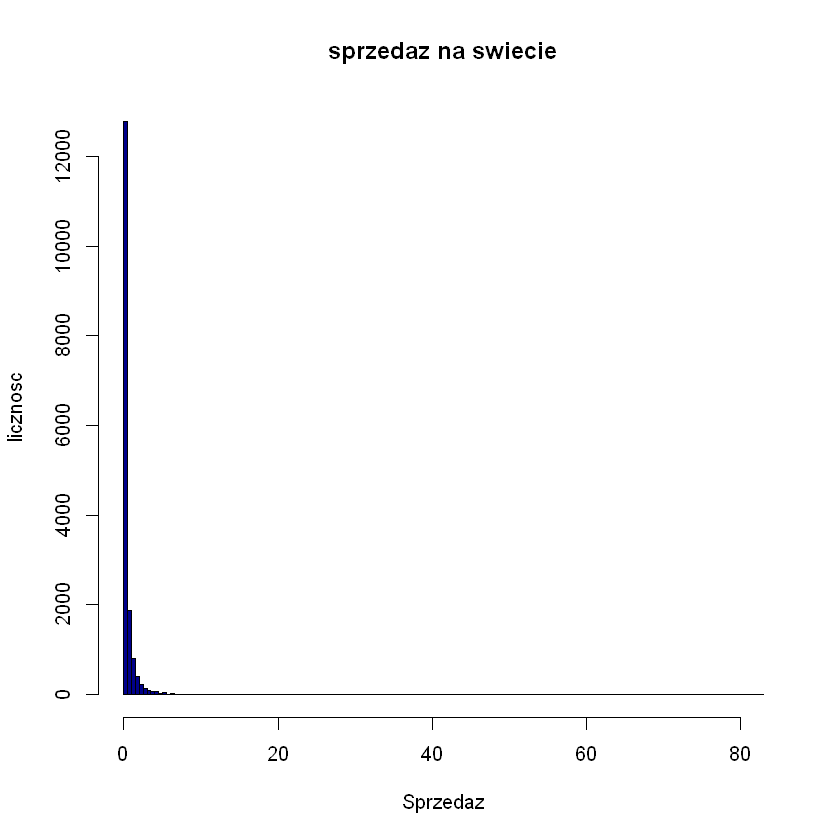

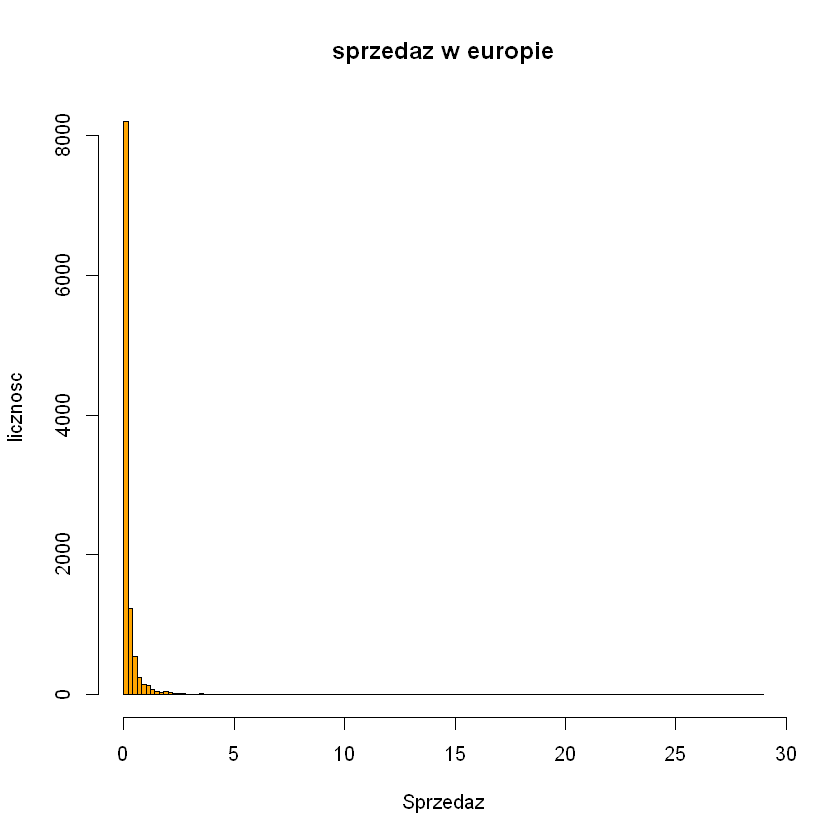

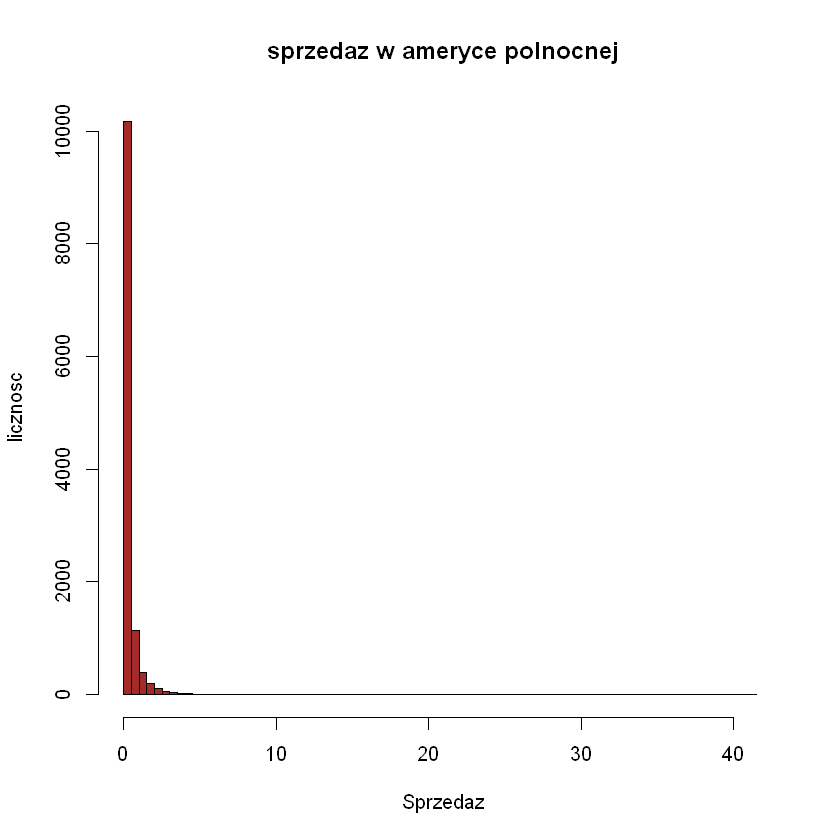

In [16]:
create_histogram <- function(dane, number, title = "histogram", color="orange"){
 hist(dane,xlim=c(floor(min(dane)),ceiling(max(dane))),breaks=number, main = title, xlab="Sprzedaż",ylab="liczność",col=color)   
}
create_histogram(Dane$Global_Sales, num_global,"sprzedaz na swiecie","darkblue")
create_histogram(EU_Sales,num_eu,"sprzedaz w europie")
create_histogram(NA_Sales,num_na,"sprzedaz w ameryce polnocnej","brown")

W danych odzwierciedlonych na histogramach znajduje się wiele tytułów o niskiej ilości sprzedanych kopii np 0.01, a niewiele wartości dużych. Co wpływa na ich wygląd i małą czytelność. Spróbuję zmodyfikować wybrane dane.

## 4.3 Druga wersja histogramów sprzedaży

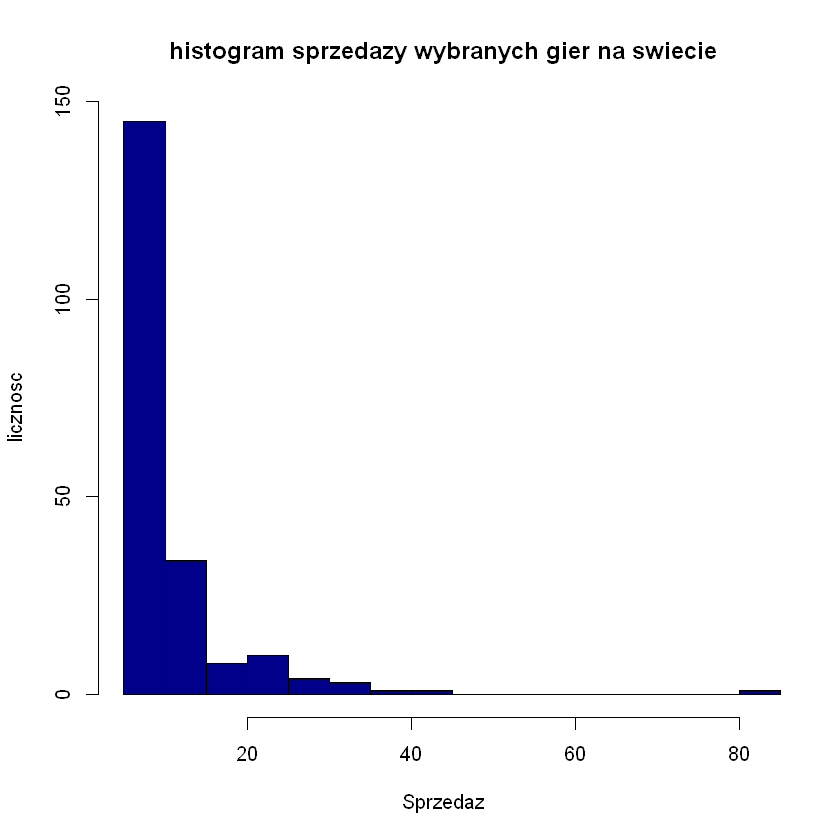

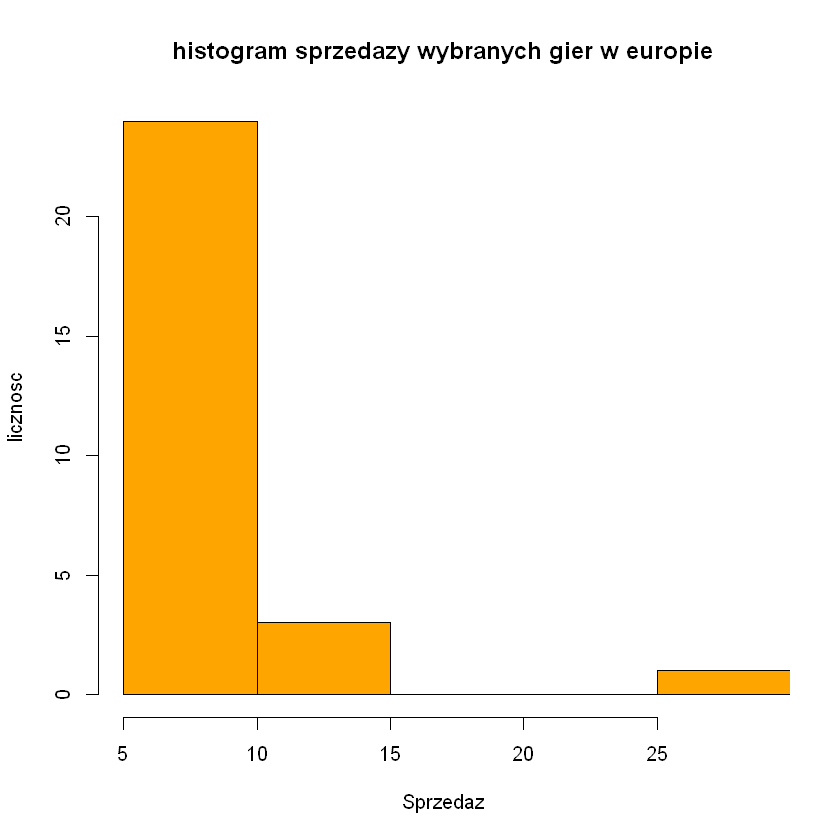

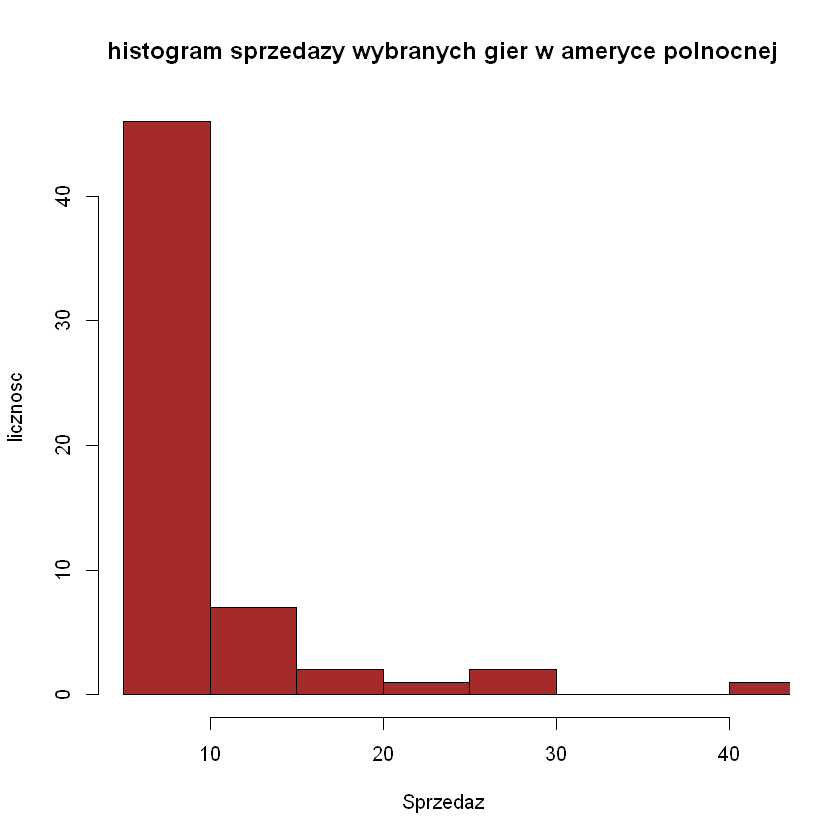

In [17]:
num_global <- round(sqrt(length(Global_Sales[Global_Sales>5])))
num_eu <- round(sqrt(length(EU_Sales[EU_Sales>5])))
num_na <- round(sqrt(length(NA_Sales[NA_Sales>5])))

create_histogram(Global_Sales[Global_Sales>5],num_global,"histogram sprzedazy wybranych gier na swiecie","darkblue")
create_histogram(EU_Sales[EU_Sales>5],num_eu,"histogram sprzedazy wybranych gier w europie")
create_histogram(NA_Sales[NA_Sales>5],num_na,"histogram sprzedazy wybranych gier w ameryce polnocnej","brown")

Największe zróżnicowanie widać w sprzedaży gier na świecie, a najmniejsze w europie, co jest logiczną konsekwencją ogólnej ilości sprzedawanych gier na poszczególnych rynkach. W histogramie sprzedaży w ameryce jest lepiej widoczna tendencja spadkowa, prawdopodbnie dlatego, że dużo danych znajduje się na poziomie sprzedaży [5-10] miliona sprzedanych kopii. "Dziura" w histogramie prawdopodobnie wynika z małej liczby danych znajdujących się w przedziale [45-80) miliona sprzedanych kopii.

# 5. Histogramy dotyczące rankingu użytkowników

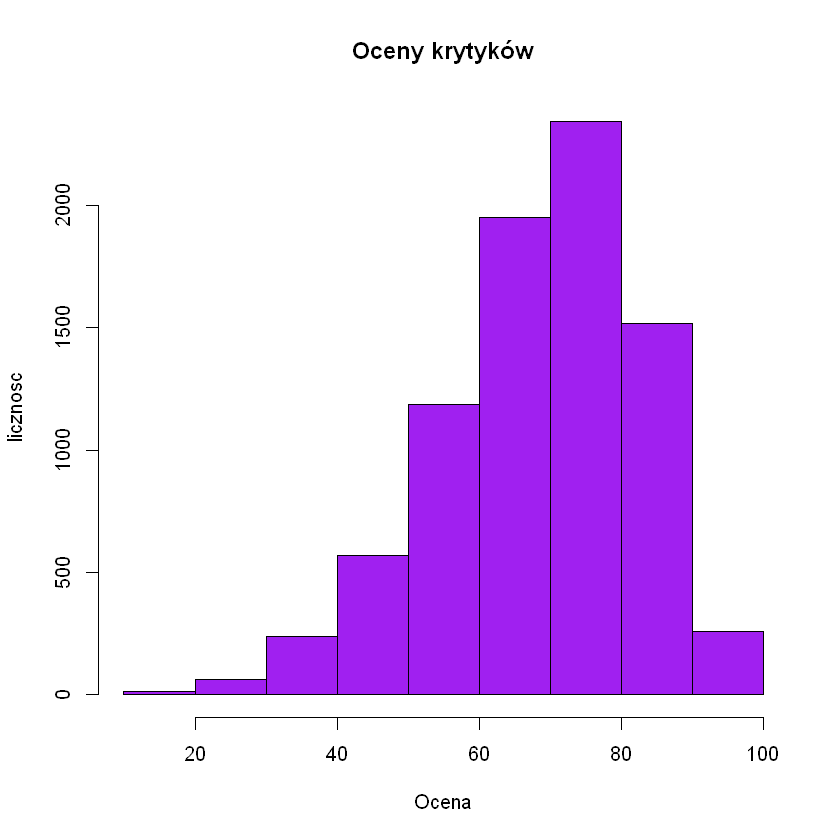

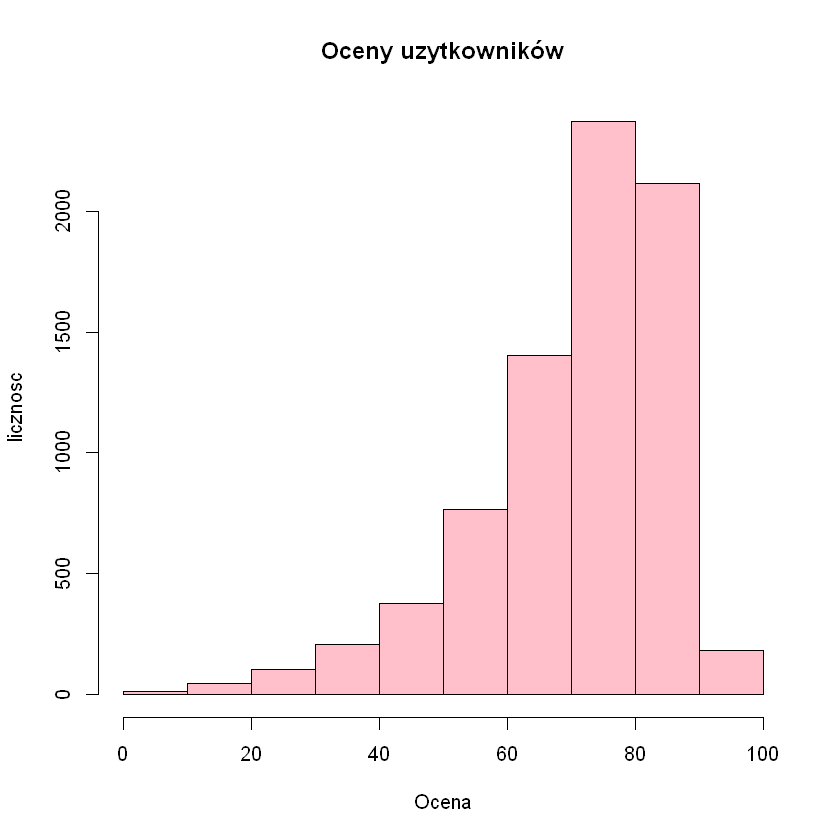

In [18]:
par(mfrow=c(1,1))
hist(Critic_Score, main="Oceny krytyków", breaks=10,xlab="Ocena",ylab="liczność",col="purple")
hist(User_Score*10, main="Oceny użytkowników", breaks=10,xlab="Ocena",ylab="liczność",col="pink")

Zastosowałam podział na 10 przedzialow, poniewaz jest to liczba, która ladnie dzieli skale [1-10] i [1-100]. Dla lepszego porownania przeskalowałam również skalę ocen użytkowników aby pasowała do skali ocen krytyków. Co nie powoduje żadnej znaczącej zmiany. Oba wykresy są zbliżone do rozkładu normalnego, ale są "przesunięte" w prawo w stosunku do niego. Co jest logiczną konsekwencją ujemnej skośności.

# 6. Inne wykresy

## 6.1 Podstawowe wykresy punktowe dotyczące ocen

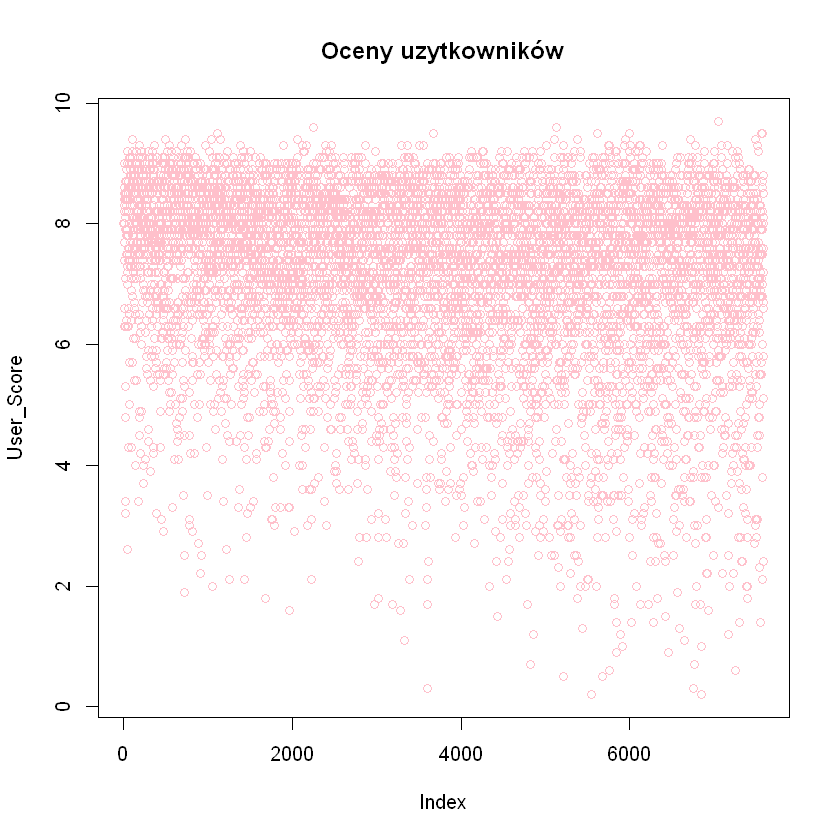

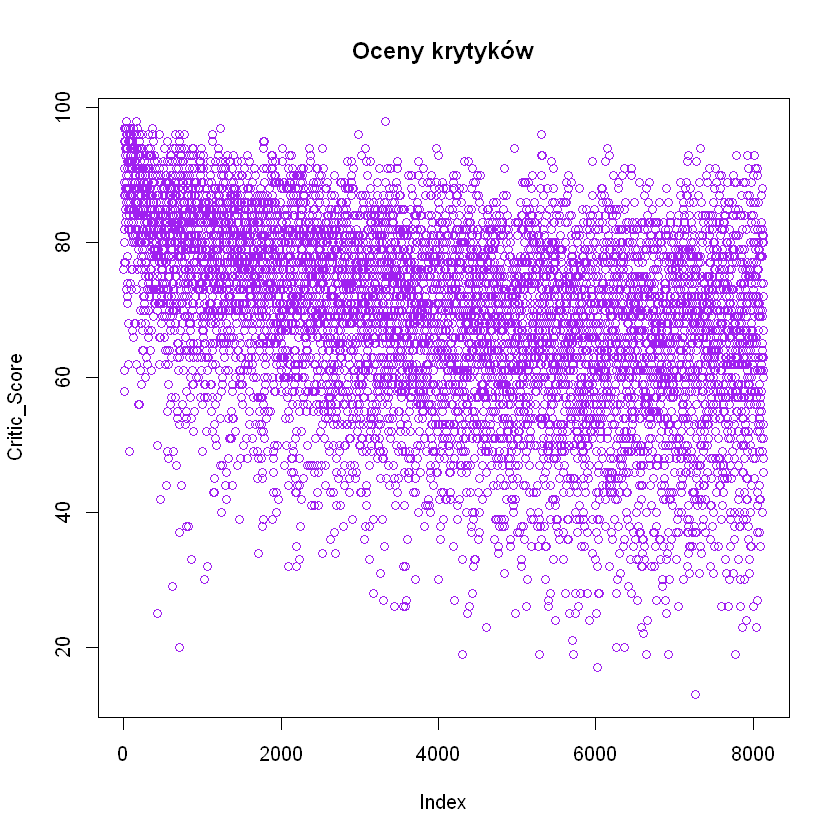

In [19]:
par(mfrow=c(1,1))
plot(User_Score,col="pink",main="Oceny użytkowników")
plot(Critic_Score,col="purple", main="Oceny krytyków")

Oba rodzaje ocen znajdują się w górnej części wykresu, co świadczy o tym, że zostały wzięte pod uwagę w większości gry z wysokimi ocenami.Świadczą o tym również wysokie sprzedaże, jednak oceny krytyków są minimalnie gorsze od ocen użytkowników.

## 6.2 Podstawowe wykresu punktowe dotyczące sprzedaży

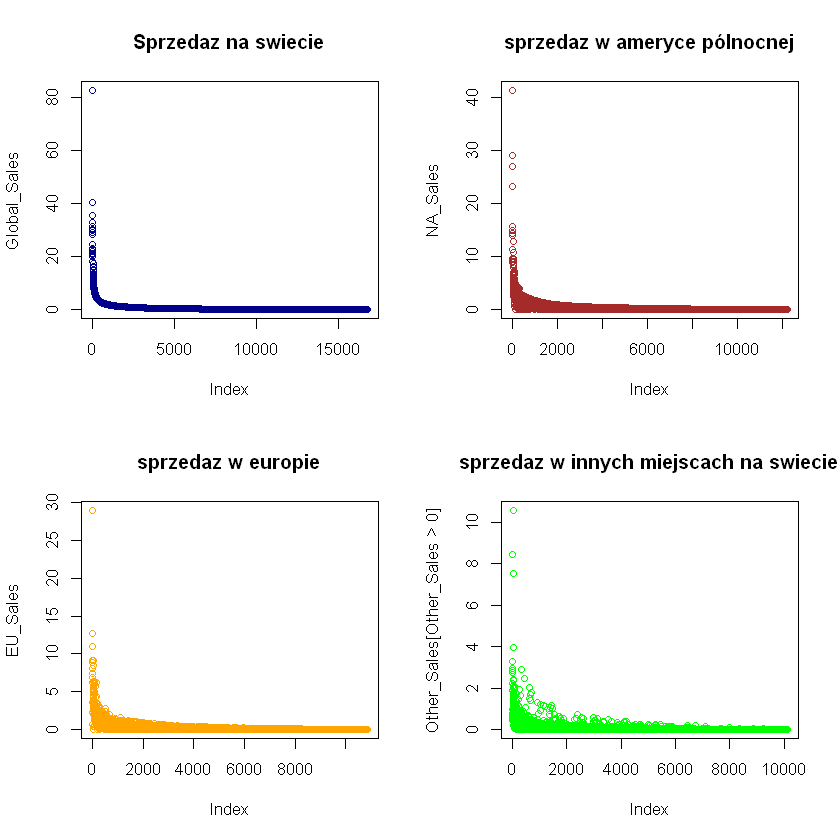

In [20]:
par(mfrow=c(2,2))
plot(Global_Sales, col="darkblue", main="Sprzedaż na świecie")
plot(NA_Sales, col ="brown", main = "sprzedaż w ameryce północnej")
plot(EU_Sales, col="orange", main="sprzedaż w europie")
plot(Other_Sales[Other_Sales>0], col="green", main="sprzedaż w innych miejscach na świecie")

Rozkłady sprzedaży zdają się zbliżać do wyglądu funkcji f(x) = 1/x, co głównie widać na wykresie sprzedaży na świecie. Wynika to z faktu, że dane są posortowane względem sprzedaży na świecie, więc największa ilość sprzedanych kopii gier znajdzie się na początku wykresu, a najmniejsze wartości na samym końcu. Wpływa to również na wygląd pozostałych 4 wykresów, gdyż sprzedaże z innych części świata wliczają się w sprzedaże na świecie.

## 6.3 Wykres kołowy opisujący sprzedaż na świecie

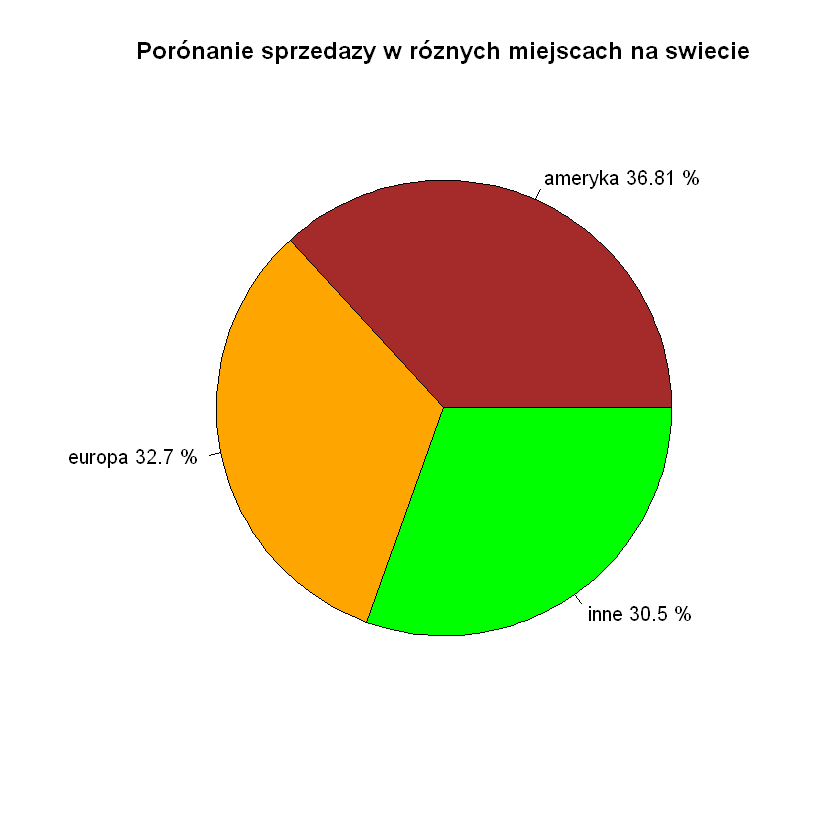

In [21]:
suma<-length(NA_Sales)+length(Other_Sales[Other_Sales>0])+length(EU_Sales)
wskaznik<-100/suma
wektor<-c(length(NA_Sales),length(EU_Sales),length(Other_Sales[Other_Sales>0]))*wskaznik
pie(wektor,labels=paste(c("ameryka","europa","inne"),round(wektor,2),"%"),main="Porónanie sprzedaży w różnych miejscach na świecie",col=c("brown","orange","green"))

W ameryce sprzedaje się większość kopii gier dostępnych na rynku. Biorąc pod uwagę fakt, że wszystkie dane dotyczące sprzedaży podane są w milionach, jest to już znacząca różnica pomiędzy resztą danych.

# 7.Testy statystyczne

Przy tak dużej ilości danych na potrzeby testów założę, że moje dane są populacją i wybiorę próby, które będę wykorzystywać do testów. Zacznę od ocen użytkowników i wykonam test dotyczący średniej oceny użytkowników.

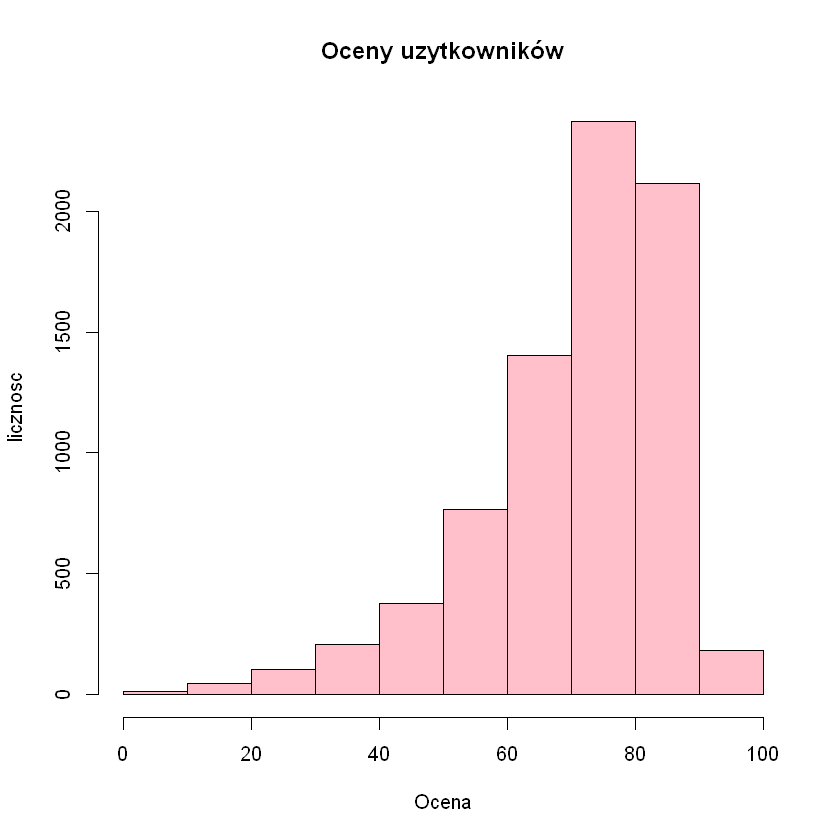

In [22]:
hist(User_Score*10, main="Oceny użytkowników", breaks=10,xlab="Ocena",ylab="liczność",col="pink")

Mój rozkład jest mocno skośny, ale przypomina rozkład normalny.

## 7.1 wybór próby i test Z

Rozmiar 40 wydaję się idealnym do  tego typu testu i taki też zastosuje jako liczność próby wybranej z populacji do testu. Próba zostanie wygenerowana za pomocą generatora, który zostanie podany poniżej.

Wybieram test Z, ponieważ mam spełnione założenia. Wybrałam dużą próbę ze znanej populacji, co oznacza, że znam wariancję, punkty zostały losowo wybrane i są od siebie niezależne, czyli wynik jednego punktu nie wpływa na inne.

Pętla użyta do generowania danych:

for(i in 1:40){

proba[i]<-User_Score[runif(40,min=1,max=length(User_Score))]

}

Sprawdzam hipotezę, że oceny użytkowników są niższe niż średnia ocena użytkowników populacji. Gdzie średnia ocen wynosi: 7.126. Zakładam poziom istotności 0.05.

H0: u = 7.126

H1: u<7.126

In [23]:
#proba<-array(0,dim=c(1,40))
#for(i in 1:40){
#    proba[i]<-User_Score[runif(1,min=1,max=length(User_Score))]
#}
proba<-c(8.2,6.2,7,5.4,4.7,6.5,3.1,8.1,8.2,6.1,6.6,3.7,9, 6.8,7,6.3,7.4,4.3, 4.8,6.6,7.3,5.4,7.5,7.8,5.2,5.7,7.6,7.9,8.8,7.7,7,6.1, 8.6,5.7,5.7,7.3,8.2,6,7.9,7.1)
proba_mean<-mean(proba)
odchylenie<-1.498
Z<-(proba_mean-7.126)*sqrt(length(proba))/(odchylenie)
print("Wartosc statystyki Z:")
Z
print("p-value:")
pnorm(Z)
print("wartość krytyczna: ")
qnorm(0.05)

[1] "Wartosc statystyki Z:"


[1] -1.956897

[1] "p-value:"


[1] 0.0251798

[1] "wartosc krytyczna: "


[1] -1.644854

Statystyka znajduje się w przedziale krytycznym, mogę odrzucić H0 na rzecz H1. Dodatkowo p-value jest mniejsze od alfy, więc mogę stwierdzić, że oceny wystawiane przez użytkowników są niższe od średniej.

## 7.2 Test Z dla próby

Zrobie teraz to samo dla losowo wybranej próby z ocen krytyków.

Generator:

for(i in 1:40){

    crit[i]<-Critic_Score[runif(40,min=1,max=length(Critic_Score))]
    
}

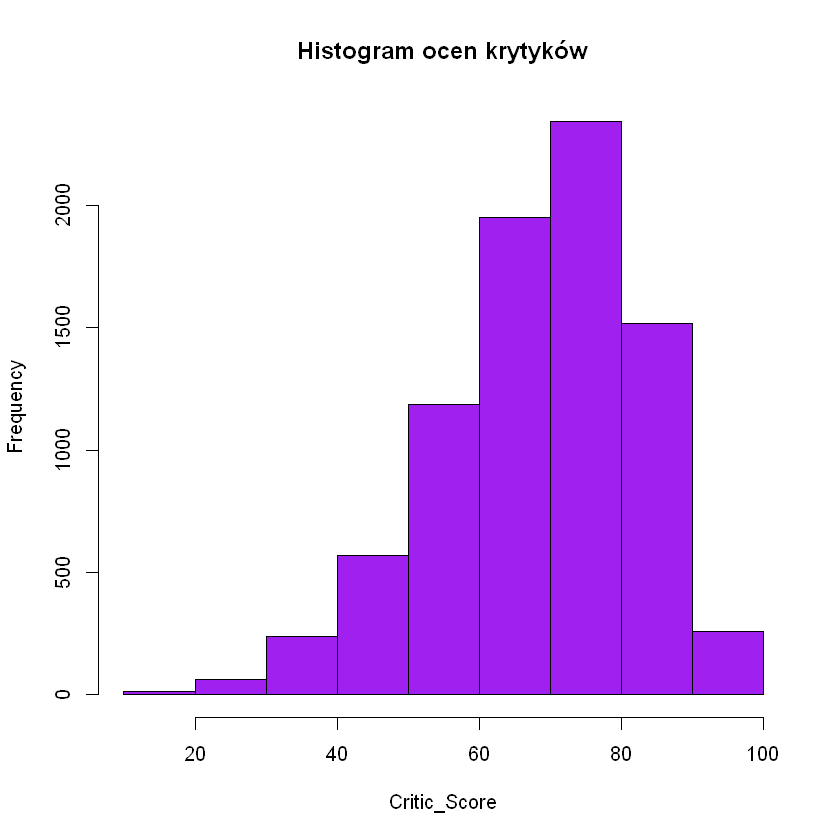

In [24]:
hist(Critic_Score,breaks=10,col="purple",main="Histogram ocen krytyków")

Tutaj sytuacja wygląda zdecydowanie lepiej, co nie jest dziwne patrząc na to, że rozkład ocen krytyków przypomina rozkład normalny. Założę standardowy rozmiar n=40 i wybiorę losową próbkę danych.

In [25]:
#crit<-array(0,dim=c(1,40))
crit<-c(75 ,59 ,72 ,72 ,67,70 ,76 ,86 ,90 ,47 ,67 ,77 ,70 ,53 ,67 ,71 ,78 ,72 ,51,58 ,69 ,75 ,61, 87 ,44 ,86 ,43 ,70 ,84 ,73 ,57 ,71 ,75 ,59 ,47 ,66 ,81 ,69 ,33 ,66 )

W tym teście sprawdzę czy oceny krytyków różnią się od średniej. Tym razem wybiorę alfa=0.08, średnia populacji wynosi 68.97, a odchylenie standardowe 13.94. Do tego cely wybiorę test Z, ponieważ zgadza się liczność próby n>30 i jak wyżej inne założenia są spełnione, a dodatkowo rozkład przypomina normalny.

In [26]:
alfa<-0.08
srednia<-68.97
od<-13.94
Z<-(mean(crit)-68.97)*sqrt(length(crit))/(od)
print("wartość statystyki:")
Z
print("wartość krytcyzna:")
paste("(-inf, ", qnorm(alfa/2), ") , (", qnorm(1-alfa/2), ", inf)")

[1] "wartosc statystyki:"


[1] -0.7349914

[1] "wartosc krytcyzna:"


[1] "(-inf,  -1.75068607125217 ) , ( 1.75068607125217 , inf)"

Statystyka nie należy do przedziału krytycznego, więc tym samym nie mogę odrzucić H0 na rzecz H1.
Co jest prawdopodobnie prawdziwe, gdyż rozkład próby mocno przypomina rozkład populacji.

## 7.3 Test dla zbiorowości niesparowanych, n>=30

Wykonam jeszcze jeden test, w którym sprawdzę czy użytkownicy wystawiają lepsze oceny niż krytycy i dla uproszczenia w obu miejscach przyjmę skale [1-100]. Poziom istotności założe 0.04.

Wykonam test dla niesparowany dla dwóch zbiorowości i dużych populacji. (n>=30)

H0: uużytkownik = ukrytyk

H1: uużytownik > ukrytyk

In [27]:
User_Score<-10*User_Score
var_user_score <- var(User_Score)

In [28]:
#Critic_Score
#User_Score
EX_critic<-length(Critic_Score[Critic_Score>mean_critic_score])/length(Critic_Score)
EX_user <- length(User_Score[User_Score>10*mean_user_score])/length(User_Score)
ODC <-EX_critic*(1-EX_critic)/length(Critic_Score)
#ODC
ODU<-EX_user*(1-EX_user)/length(User_Score)
#ODU
Z<-(EX_user-EX_critic)/(sqrt(ODC+ODU))

print("statystyka Z:")
Z
print("p-value: ")
1-pnorm(Z)

[1] "statystyka Z:"


[1] 3.498052

[1] "p-value: "


[1] 0.0002343353

Otrzymana wartość statystyki i p-value (0.04>0.0002) pozwala odrzucić hipotezę zerową na rzecz H1, co oznacza, że użytkownicy wystawiają lepsze oceny grą niż krytycy. Jest to dość dobry wynik, gdyż znacznie zwiększając poziom istotności również doszłabym do tego samego wniosku.

# 8. Podsumowanie

Powyższa analiza wykazała, że użytkownicy w realnym stopniu wpływają na rynek gier. W dużym stopniu rozkład ocen przypomina rozkład normalny zarówno u ocen krytyków jak i w ocenach użytkowników. Dodatkowo widać, że sprzedaż rozkłada się w większości miejsc na świecie w podobny sposób. Dalej można by testować hipotezy o korelacji prób np. ocen krytyków i użytkowników, albo można sprawdzić jak oceny wpływają na sprzedaże w poszczególnych częściach świata. Dane są dośc uniwersalne, więc można znaleźć dużo przykładów. 